# German real estate market listings

###### datasource: Immobilienscout.de

In [1]:
%load_ext nb_black

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)

import pandas as pd

<IPython.core.display.Javascript object>

## 1) Data cleaning

###### load data

In [2]:
filepath = "../data/mieten2020-04-10.csv"
rent_df = pd.read_csv(filepath, sep=";", low_memory=False)
pd.set_option("display.max_columns", rent_df.shape[1])

<IPython.core.display.Javascript object>

In [3]:
rent_df

,timestamp,obj_regio1,obj_serviceCharge,obj_heatingType,ga_cd_via_qualified,obj_telekomTvOffer,obj_telekomHybridUploadSpeed,obj_cId,obj_newlyConst,obj_balcony,obj_picture,obj_picturecount,obj_pricetrend,obj_telekomUploadSpeed,obj_totalRent,obj_telekomTrackingGroup,obj_telekomInternetTechnology,obj_yearConstructed,obj_telekomInternetType,obj_pricetrendbuy,obj_scoutId,obj_noParkSpaces,obj_firingTypes,obj_hasKitchen,obj_ExclusiveExpose,obj_telekomInternetProductName,geo_bln,obj_cellar,obj_yearConstructedRange,obj_baseRent,obj_houseNumber,obj_pricetrendrent,obj_livingSpace,geo_krs,obj_zipCode,obj_condition,obj_interiorQual,obj_petsAllowed,ga_cd_cxp_historicallisting,obj_telekomDownloadSpeed,obj_street,obj_lift,obj_depositLink,obj_baseRentRange,obj_telekomInternetUrlMobile,obj_telekomInternetUrl,obj_streetPlain,obj_typeOfFlat,geo_plz,obj_noRooms,obj_assistedLiving,obj_ityp,obj_telekomHdTelephone,geo_land,ga_cd_via,obj_telekomInternet,obj_immotype,obj_telekomHybridDownloadSpeed,obj_floor,obj_telekomInternetServices,obj_telekomInternetProductAvailable,obj_cwId,ga_cd_application_requirements,obj_numberOfFloors,obj_noRoomsRange,ga_cd_maillead_default_shown,obj_garden,evt_count_pm_sig,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,obj_galleryAd,obj_energyType,obj_energyEfficiencyClass,obj_thermalChar,obj_heatingCosts,obj_lastRefurbish,obj_groupnumber,ga_cd_developer_virtualreality,obj_project_id,obj_nbp,ga_cd_customer_group
0,2020-04-10 01:00:02.527986,Baden_Württemberg,300.0,central_heating,True,ONE_YEAR_FREE,10 MBit/s,284440,n,y,https://pictures.immobilienscout24.de/listings...,32,4.77,"2,4 MBit/s",2190.00,telekom_layer_magenta_m_hybrid2,über Hybrid,1996.0,WITH_HYBRID,7.42,116834384,1.0,heat_supply,y,False,MagentaZuhause M Hybrid (2),Baden_Württemberg,n,5.0,1890.00,no_information,4.77,160.00,Heidelberg,69118,well_kept,sophisticated,negotiable,False,16 MBit/s,no_information,n,n,8,https://padlock.link/mmh2sa,https://padlock.link/mmhy2,no_information,maisonette,69118,4.0,n,"0,active",True,Deutschland,schaufenster,50 MBit/s,wohnung_miete,50 MBit/s,0.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd",True,001.284440,profile0,3.0,4,True,n,showqualicontactform,n,Ziegelhausen,202005,7,Heidelberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-10 01:00:02.772930,Nordrhein_Westfalen,101.3,NaN,True,ONE_YEAR_FREE,10 MBit/s,9627,n,n,https://pictures.immobilienscout24.de/listings...,8,3.99,"2,4 MBit/s",521.30,telekom_layer_magenta_m_hybrid2,über Hybrid,1964.0,WITH_HYBRID,12.65,116965848,NaN,gas,n,True,MagentaZuhause M Hybrid (2),Nordrhein_Westfalen,y,2.0,399.00,91,3.99,49.00,Dortmund,44329,no_information,no_information,no_information,False,16 MBit/s,Altendernerstra&szlig;e,n,y,2,https://padlock.link/mmh2sa,https://padlock.link/mmhy2,Altendernerstraße,roof_storey,44329,3.5,n,"0,active",True,Deutschland,schaufenster,50 MBit/s,wohnung_miete,50 MBit/s,2.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd",True,001.9627,profile0,3.0,3,True,n,showqualicontactform,n,Derne,1821-41-M,2,Dortmund,disabled,energy_required,D,109.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-10 01:00:03.025365,Nordrhein_Westfalen,95.0,NaN,True,ONE_YEAR_FREE,NaN,9627,n,y,https://pictures.immobilienscout24.de/listings...,11,3.32,40 MBit/s,448.00,telekom_layer_magenta_l,über VDSL,2007.0,REGULAR,12.02,116948797,NaN,district_heating,n,True,MagentaZuhause L,Nordrhein_Westfalen,y,7.0,310.00,100,3.32,45.48,Duisburg,47178,no_information,no_information,no_information,False,100 MBit/s,Franz-Lenze-Stra&szlig;e,n,y,2,https://padlock.link/ioml,https://padlock.link/ml,Franz-Lenze-Straße,apartment,47178,2.5,n,"0,active",True,Deutschland,schaufenster,100 MBit/s,wohnung_miete,NaN,1.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,001.9627,profile0,2.0,2,True,n,showqualicontactform,n,Vierlinden,6921-16-M,2,Duisburg,disabled,energy_consumption,C,93.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-10 01:00:03.303110,Nordrhein_Westfalen,117.0,NaN,True,ONE_YEAR_FREE,NaN,9627,

<IPython.core.display.Javascript object>

In [4]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85532 entries, 0 to 85531
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            85532 non-null  object 
 1   obj_regio1                           85532 non-null  object 
 2   obj_serviceCharge                    83802 non-null  float64
 3   obj_heatingType                      74269 non-null  object 
 4   ga_cd_via_qualified                  2392 non-null   object 
 5   obj_telekomTvOffer                   75256 non-null  object 
 6   obj_telekomHybridUploadSpeed         11256 non-null  object 
 7   obj_cId                              85532 non-null  int64  
 8   obj_newlyConst                       85532 non-null  object 
 9   obj_balcony                          85532 non-null  object 
 10  obj_picture                          84285 non-null  object 
 11  obj_picturecount            

<IPython.core.display.Javascript object>

###### remove duplicates:

In [5]:
rent_df = rent_df.drop_duplicates(subset="obj_scoutId")

<IPython.core.display.Javascript object>

###### remove columns with missing values

In [6]:
rent_df = rent_df[rent_df.columns[~rent_df.isnull().any()]]

<IPython.core.display.Javascript object>

###### show cleaned data

In [7]:
rent_df

,timestamp,obj_regio1,obj_cId,obj_newlyConst,obj_balcony,obj_picturecount,obj_scoutId,obj_hasKitchen,geo_bln,obj_cellar,obj_baseRent,obj_houseNumber,obj_livingSpace,geo_krs,obj_zipCode,obj_condition,obj_interiorQual,obj_petsAllowed,obj_street,obj_lift,obj_depositLink,obj_baseRentRange,obj_streetPlain,obj_typeOfFlat,geo_plz,obj_noRooms,obj_assistedLiving,obj_ityp,geo_land,ga_cd_via,obj_immotype,obj_cwId,ga_cd_application_requirements,obj_noRoomsRange,ga_cd_maillead_default_shown,obj_garden,obj_barrierFree,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2
0,2020-04-10 01:00:02.527986,Baden_Württemberg,284440,n,y,32,116834384,y,Baden_Württemberg,n,1890.00,no_information,160.00,Heidelberg,69118,well_kept,sophisticated,negotiable,no_information,n,n,8,no_information,maisonette,69118,4.0,n,"0,active",Deutschland,schaufenster,wohnung_miete,001.284440,profile0,4,True,n,n,Ziegelhausen,202005,7,Heidelberg
1,2020-04-10 01:00:02.772930,Nordrhein_Westfalen,9627,n,n,8,116965848,n,Nordrhein_Westfalen,y,399.00,91,49.00,Dortmund,44329,no_information,no_information,no_information,Altendernerstra&szlig;e,n,y,2,Altendernerstraße,roof_storey,44329,3.5,n,"0,active",Deutschland,schaufenster,wohnung_miete,001.9627,profile0,3,True,n,n,Derne,1821-41-M,2,Dortmund
2,2020-04-10 01:00:03.025365,Nordrhein_Westfalen,9627,n,y,11,116948797,n,Nordrhein_Westfalen,y,310.00,100,45.48,Duisburg,47178,no_information,no_information,no_information,Franz-Lenze-Stra&szlig;e,n,y,2,Franz-Lenze-Straße,apartment,47178,2.5,n,"0,active",Deutschland,schaufenster,wohnung_miete,001.9627,profile0,2,True,n,n,Vierlinden,6921-16-M,2,Duisburg
3,2020-04-10 01:00:03.303110,Nordrhein_Westfalen,9627,n,y,12,117174682,n,Nordrhein_Westfalen,y,325.08,9,59.68,Unna_Kreis,59174,well_kept,normal,no_information,Einsteinstra&szlig;e,y,y,2,Einsteinstraße,apartment,59174,2.5,n,"0,active",Deutschland,schaufenster,wohnung_miete,001.9627,profile0,2,True,n,y,Kamen,1210-19-M,2,Unna_Kreis
4,2020-04-10 01:00:03.597852,Nordrhein_Westfalen,9627,n,n,9,117174685,n,Nordrhein_Westfalen,y,436.00,82,63.00,Essen,45356,no_information,no_information,no_information,H&uuml;lsenbruchstra&szlig;e,n,y,3,Hülsenbruchstraße,ground_floor,45356,3.5,n,"0,active",Deutschland,schaufenster,wohnung_miete,001.9627,profile0,3,True,n,n,Vogelheim,1212-50-M,3,Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85527,2020-04-10 15:25:46.231923,Sachsen,293446,n,n,13,88163455,n,Sachsen,y,1067.00,1,101.56,Dresden,1067,mint_condition,no_information,no_information,Wei&szlig;e Gasse,n,n,7,Weiße_Gasse,apartment,1067,4.0,n,"0,active",Deutschland,standard,wohnung_miete,001.293446,profile0,4,True,n,n,Innere_Altstadt,R_O12812,5,Dresden
85528,2020-04-10 15:25:47.083179,Schleswig_Holstein,17047200,n,n,10,88133703,y,Schleswig_Holstein,y,350.00,31,62.00,Steinburg_Kreis,25566,well_kept,normal,negotiable,Schillerstr.,n,n,2,Schillerstr.,roof_storey,25566,3.0,n,"0,active",Deutschland,standard,wohnung_miete,002.01007828002,profile0,3,True,n,n,Lägerdorf,0077-0006,3,Steinburg_Kreis
85529,2020-04-10 15:25:48.000194,Niedersachsen,5192873,n,n,8,88176847,n,Niedersachsen,y,425.00,no_information,85.19,Celle_Kreis,29328,no_information,no_information,no_information,no_information,n,y,3,no_information,apartment,29328,4.0,n,"0,active",Deutschland,standard,wohnung_miete,001.5192873,profile0,4,True,y,n,Faßberg,AAI343,4,Celle_Kreis
85530,2020-04-10 15:25:48.823732,Thüringen,240592,n,n,4,88185330,n,Thüringen,n,300.00,6,50.00,Altenburger_Land_Kreis,4600,refurbished,sophisticated,negotiable,Schm&ouml;llnsche Str.,y,n,1,Schmöllnsche_Str.,ground_floor,4600,2.0,n,"0,active",Deutschland,standard,wohnung_miete,001.240592,profile0,2,True,n,n,Altenburg,2443/6/1,2,Altenburger_Land_Kreis


<IPython.core.display.Javascript object>

In [8]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84535 entries, 0 to 85531
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       84535 non-null  object 
 1   obj_regio1                      84535 non-null  object 
 2   obj_cId                         84535 non-null  int64  
 3   obj_newlyConst                  84535 non-null  object 
 4   obj_balcony                     84535 non-null  object 
 5   obj_picturecount                84535 non-null  int64  
 6   obj_scoutId                     84535 non-null  int64  
 7   obj_hasKitchen                  84535 non-null  object 
 8   geo_bln                         84535 non-null  object 
 9   obj_cellar                      84535 non-null  object 
 10  obj_baseRent                    84535 non-null  float64
 11  obj_houseNumber                 84535 non-null  object 
 12  obj_livingSpace                 

<IPython.core.display.Javascript object>

## 2) Feature engineering

###### select features

In [9]:
select_columns = [
    "obj_scoutId",
    "obj_baseRent",
    "obj_livingSpace",
    "obj_noRooms",
    "obj_zipCode",
    "obj_regio1",
    "obj_regio2",
    "obj_regio3",
]
rent_select_df = rent_df[select_columns].copy()

<IPython.core.display.Javascript object>

###### add features

In [10]:
rent_select_df["rent_per_m2"] = (
    rent_select_df["obj_baseRent"] / rent_select_df["obj_livingSpace"]
)

<IPython.core.display.Javascript object>

In [11]:
rent_select_df

,obj_scoutId,obj_baseRent,obj_livingSpace,obj_noRooms,obj_zipCode,obj_regio1,obj_regio2,obj_regio3,rent_per_m2
0,116834384,1890.00,160.00,4.0,69118,Baden_Württemberg,Heidelberg,Ziegelhausen,11.812500
1,116965848,399.00,49.00,3.5,44329,Nordrhein_Westfalen,Dortmund,Derne,8.142857
2,116948797,310.00,45.48,2.5,47178,Nordrhein_Westfalen,Duisburg,Vierlinden,6.816183
3,117174682,325.08,59.68,2.5,59174,Nordrhein_Westfalen,Unna_Kreis,Kamen,5.447051
4,117174685,436.00,63.00,3.5,45356,Nordrhein_Westfalen,Essen,Vogelheim,6.920635
...,...,...,...,...,...,...,...,...,...
85527,88163455,1067.00,101.56,4.0,1067,Sachsen,Dresden,Innere_Altstadt,10.506105
85528,88133703,350.00,62.00,3.0,25566,Schleswig_Holstein,Steinburg_Kreis,Lägerdorf,5.645161
85529,88176847,425.00,85.19,4.0,29328,Niedersachsen,Celle_Kreis,Faßberg,4.988848
85530,88185330,300.00,50.00,2.0,4600,Thüringen,Altenburger_Land_Kreis,Altenburg,6.000000


<IPython.core.display.Javascript object>

###### sort zipCodes by feature

In [16]:
min_count = 3
aggregate = "median"
feature = "rent_per_m2"

zip_group = rent_select_df.groupby("obj_zipCode")
filt = zip_group[feature].agg([aggregate, "count"])["count"] >= min_count
rent_zip_df = (
    zip_group[feature]
    .agg([aggregate, "count"])[filt]
    .sort_values(by=aggregate, ascending=False)
)

<IPython.core.display.Javascript object>

## 3) Results

In [17]:
rent_zip_df

,median,count
obj_zipCode,,
81547,36.833333,12
80333,35.000000,19
80469,33.392857,65
81829,31.912037,24
80538,30.977444,30
...,...,...
3197,4.000000,5
63679,3.992822,5
38838,3.808989,3


<IPython.core.display.Javascript object>

In [15]:
rent_filt_col = "obj_zipCode"
rent_filt_arg = 72074

rent_filt = rent_select_df[rent_filt_col] == rent_filt_arg
rent_select_df[rent_filt]

,obj_scoutId,obj_baseRent,obj_livingSpace,obj_noRooms,obj_zipCode,obj_regio1,obj_regio2,obj_regio3,rent_per_m2
22609,117067170,865.0,63.85,2.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,13.547377
27573,94758279,475.0,30.50,1.5,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,15.573770
34325,117139032,900.0,72.00,2.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,12.500000
40930,117015876,400.0,21.00,1.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,19.047619
55948,116358365,350.0,11.00,1.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,31.818182
58453,116058550,470.0,22.76,1.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,20.650264
81669,104538924,300.0,19.00,1.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,15.789474
85029,90113522,620.0,45.00,2.0,72074,Baden_Württemberg,Tübingen_Kreis,Tübingen,13.777778


<IPython.core.display.Javascript object>

###### number of listings with feature

Text(0, 0.5, 'counts')

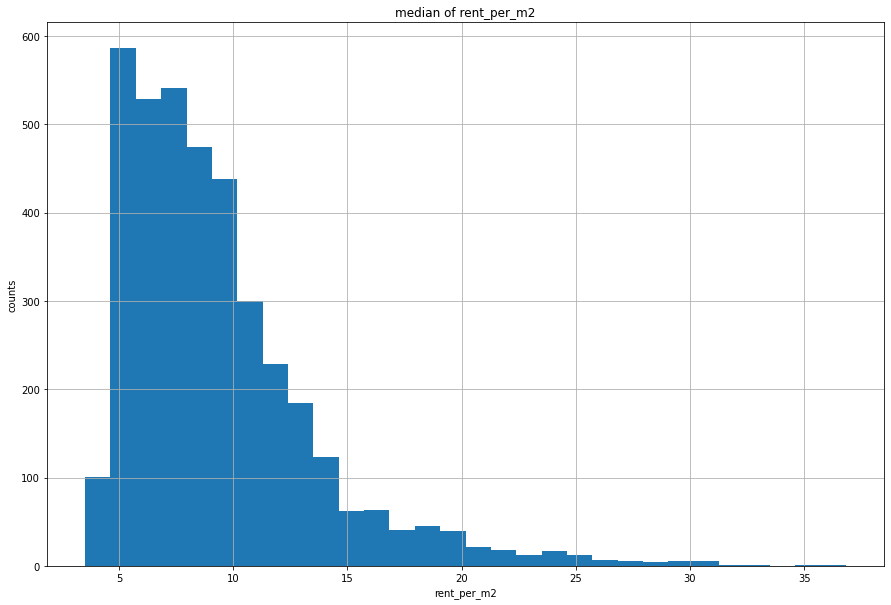

<IPython.core.display.Javascript object>

In [18]:
rent_zip_df.hist(column=aggregate, bins=30)
plt.title(aggregate + " of " + feature)
plt.xlabel(feature)
plt.ylabel("counts")